# Analyze the Data

#### 1 - Load Clean Building Data
#### 2 - Analyze
####   


### Import Modules and Data


In [4]:
import rasterio
from tqdm import tqdm_notebook as tqdm
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.cm as cm
import random
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import axes3d

In [5]:
# Set Main Directories
project_folder = '../'
data_folder = project_folder + '1_data/'

In [ ]:
# Start the clock
start_time = time.time()

### Get Data - CSV Verion

In [7]:
bldngs_grps_initial = pd.read_csv(data_folder + "bldng_groups.csv")
bldngs_grps_initial.drop(columns=['Unnamed: 0'], inplace=True)
bldngs = pd.read_csv(data_folder + "bldngs.csv")
bldngs.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Regroup
for place in ['lat','long']:
    bldngs['group_' + str(place)] = bldngs[str(place) + 'itude']\
                            .apply(lambda x: round(x / 0.003) * 0.003)
bldngs['count'] = 1
bldngs_grps = bldngs.drop(columns=['latitude','longitude'])\
                          .groupby(['group_long', 'group_lat'])\
                            .sum()\
                            .sort_values(by='count', ascending=True)\
                            .reset_index()

In [ ]:
print "Total Buildings: " + "{:,}".format(len(bldngs))
print "Total Groups: " + "{:,}".format(len(bldngs_grps))
print "Group Reduction from HectoMeter: " \
        + "{:,}".format(len(bldngs_grps_initial)-len(bldngs_grps))

In [ ]:
# specify the vars of interest
analyvars = ['count', 'area', 'light', 'bldngval_light'\
             ,'pop', 'bldngval_pop']

In [ ]:
if False:
    for df in [bldngs_grps]:
        for var in ['count', 'bldngval_pop', 'bldngval_light']:
            df[var + '_norm'] = (df[var] - df[var].min())/ \
            (df[var].max() - df[var].min())
            df[var + '_norm_z'] = (df[var] - df[var].mean())/ \
            (df[var].std())
            df[var + '_sqrd'] = (df[var]**2)
            df[var + '_log'] = np.log(df[var])*(-1)

In [ ]:
try:
    df = bldngs_grps.groupby(bldngs_grps['count'])\
                    .mean().reset_index()
    grouped = df[analyvars]
except:
    df = bldngs_grps.groupby(bldngs_grps['count'])\
                    .mean().reset_index()
    grouped = df[analyvars]

In [ ]:
sns.set(style = 'dark')
f, axes = plt.subplots(2, 2, figsize = (8,5), sharex = True)
plt.subplots_adjust(bottom = 0.1, top = 0.9, left = 0.125\
                    , right = 0.9, hspace = 0.2, wspace = .3)
# for data in [grouped, bldngs_grps]:
for y,axis in zip(['light','bldngval_light', 'pop', 'bldngval_light']\
                  , [(0,0),(0,1),(1,0),(1,1)]):
    sns.scatterplot(y = y, x = 'count', data = bldngs_grps\
                    , ax = axes[axis])

In [ ]:
corr = bldngs_grps[analyvars].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, cmap = "YlGnBu")

In [ ]:
f, axes = plt.subplots(2, 2, figsize = (8,5), sharex = True)
plt.subplots_adjust(bottom = 0.1, top = 0.9, left = 0.125\
                    , right = 0.9, hspace = 0.2, wspace = .3)
for y,axis in zip(['light','bldngval_light', 'pop', 'bldngval_pop']\
                  , [(0,0),(0,1),(1,0),(1,1)]):
    sns.scatterplot(y = y, x = 'count', data = grouped\
                    , ax = axes[axis])

In [ ]:
corr = grouped.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, cmap = "YlGnBu")

In [ ]:
stop_time = time.time()
print 'So far, this notebook took ' \
        + str(int((stop_time-start_time)/60/60)) + ' Hours ' \
        + str(int((stop_time-start_time)/60)) + ' Minutes ' \
        + 'and ' + str(int(stop_time-start_time)%60) + ' Seconds'

In [ ]:
# state_groups = bldngs.groupby(bldngs['state']).sum()
cluster_groups = bldngs.groupby(bldngs['cluster_k5']).sum()
total = bldngs.sum()

In [ ]:
(cluster_groups[['count','area','bldngval_light','bldngval_pop']]\
         /1000000)\
        .astype(float)

In [ ]:
(total[['count','area','bldngval_light','bldngval_pop']]/1000000)\
        .astype(float).reset_index()

### 3D

In [8]:
# Regroup
grouper = 0.05
for place in ['lat','long']:
    bldngs['group_' + str(place)] = bldngs[str(place) + 'itude']\
                            .apply(lambda x: round(x / grouper) * grouper)
bldngs['count'] = 1
bldngs_grps = bldngs.drop(columns=['latitude','longitude'])\
                          .groupby(['group_long', 'group_lat'])\
                            .sum()\
                            .sort_values(by='count', ascending=True)\
                            .reset_index()

In [9]:
print "Total Buildings: " + "{:,}".format(len(bldngs))
print "Total Groups: " + "{:,}".format(len(bldngs_grps))
print "Group Reduction from HectoMeter: " \
        + "{:,}".format(len(bldngs_grps_initial)-len(bldngs_grps))

Total Buildings: 8,555,103
Total Groups: 24,894
Group Reduction from HectoMeter: 2,944,541




        ----
        to gif-ify run the following in terminal
        convert -delay 50 3dgraph*.png animated_graph.gif
        ----
        
This graph took 0 Hours 18 Minutes and 11 Seconds


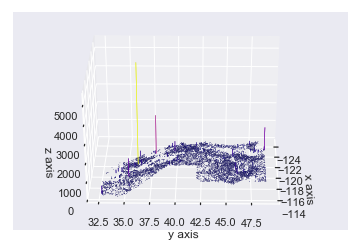

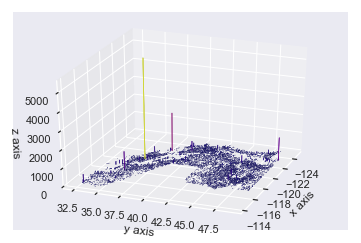

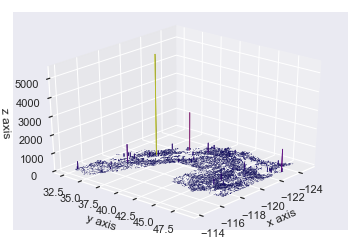

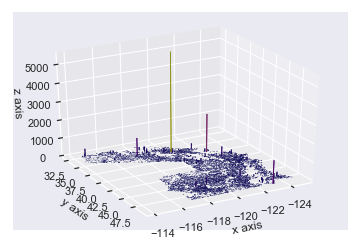

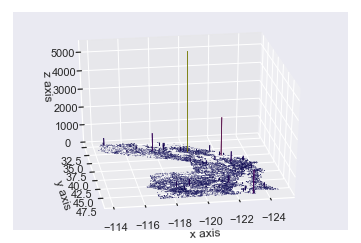

In [ ]:
graph_start = time.time()
df = bldngs_grps[:10000]

# for catg in tqdm(['pop','light']):
for angle in tqdm(range(1, 360, 20)):
# for angle in tqdm(range(0, 360, 6)):
# for angle in tqdm(range(70, 210, 2)):
    
    catg = 'pop'
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')

    x3 = df['group_long']
    y3 = df['group_lat']
    z3 = np.zeros(len(df['group_long']))

    dx = np.ones(len(df['group_long']))*grouper
    dy = np.ones(len(df['group_long']))*grouper
    dz = df[catg]
    
    cmap = cm.get_cmap('plasma')
    max_height = np.max(dz)
    min_height = np.min(dz)
    rgba = [cmap((k-min_height)/max_height) for k in dz] 


    angle = angle

    ax1.bar3d(x3, y3, z3, dx, dy, dz, color=rgba, zsort='average'\
              , edgecolor = "none")

    ax1.set_xlabel('x axis')
    ax1.set_ylabel('y axis')
    ax1.set_zlabel('z axis')
    ax1.view_init(30, angle)

    
    filename = data_folder + 'gifgraph/3dgraph_' \
                            + str(angle) + str(catg) + '.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

graph_stop = time.time()

print """
        ----
        to gif-ify run the following in terminal
        convert -delay 50 3dgraph*.png animated_graph.gif
        ----
        """ 

print 'This graph took ' \
        + str(int((graph_stop-graph_start)/60/60)) + ' Hours ' \
        + str(int((graph_stop-graph_start)/60)) + ' Minutes ' \
        + 'and ' + str(int(graph_stop-graph_start)%60) + ' Seconds'

In [ ]:
stop_time = time.time()
print 'This notebook took ' \
        + str(int((stop_time-start_time)/60/60)) + ' Hours ' \
        + str(int((stop_time-start_time)/60)) + ' Minutes ' \
        + 'and ' + str(int(stop_time-start_time)%60) + ' Seconds'